<a href="https://colab.research.google.com/github/deviknitkkr/ML-Models/blob/main/LSTM-timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


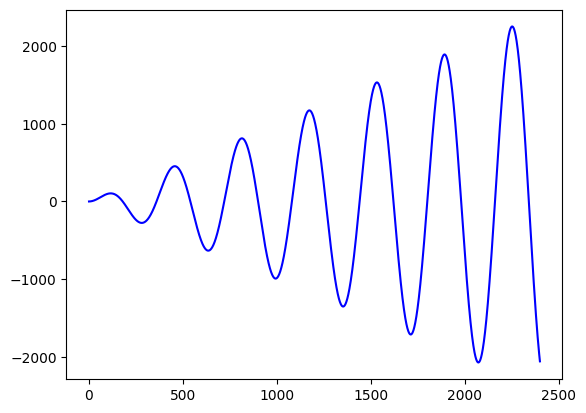

In [3]:
numbers = list(range(1, 2400))

# Calculate the square roots of the numbers using a list comprehension
sqrt_numbers = [x*math.sin(math.radians(x)) for x in numbers]


# Create a 2D array with the two lists as columns
data = [[numbers[i], sqrt_numbers[i]] for i in range(len(numbers))]
plt.plot([row[0] for row in data], [row[1] for row in data], color='blue',label='Actual')

In [4]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)-n_features):
		end_ix = i + n_features
		X.append(timeseries_data[i:end_ix])
		y.append(timeseries_data[end_ix])
	return np.array(X), np.array(y)

In [5]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)

train_data = [row[1] for row in data[:train_size]]

n_steps = 180
n_features = 1
trainX, trainY = prepare_data(train_data, n_steps)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1)

trainPredict = model.predict(trainX)

Epoch 1/5
1739/1739 [==============================] - 133s 75ms/step - loss: nan
Epoch 2/5
1259/1739 [====================>.........] - ETA: 35s - loss: nan

In [ ]:
future_point= 250
future_dates=np.arange(len(train_data),len(train_data)+future_point)
future_values = train_data

for i in range (1,future_point):
  input = np.array(future_values[-n_steps:])
  input = input.reshape((1, n_steps, n_features))
  yhat = model.predict(input, verbose=0)
  future_values.append(yhat[0][0])

plt.plot([row[0] for row in data], [row[1] for row in data], color='blue',label='Actual')
plt.plot([row[0] for row in data[:trainPredict.shape[0]]], [row[0] for row in trainPredict], color='green',label='Trained')
plt.plot(future_dates, future_values[-future_point:], color='red',label='Forcasted')
# Add labels for the x and y axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the graph
plt.show()